1. Check how long do people travel with Uber?
2. What Hour do most people take uber to their destination
3. Check the purpose of Trips?
4. Which day has the highest number of trips?
5. What are the number of Trips per each day?
6. What are the trip in the month?
7. The start and the ending point?

# Import Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [18]:
data = pd.read_csv("Uber Drives - .csv")
data.head(3)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [13]:

data.head(4)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting


# 2. Check the missing values

NaN -> Not a Number

In [19]:
# missing values
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [20]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [21]:
data = data.dropna()

In [22]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [10]:
data.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1150,False,False,False,False,False,False,False
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False


In [48]:
data["CATEGORY*"].value_counts()

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

In [23]:
# sepreate the hour, day, dayof week, month and weekday

data["START_DATE*"] = pd.to_datetime(data["START_DATE*"], format="%m/%d/%Y %H:%M")
data["END_DATE*"] = pd.to_datetime(data["END_DATE*"], format="%m/%d/%Y %H:%M")

hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data["START_DATE*"]:
  hour.append(x.hour)
  day.append(x.day)
  dayofweek.append(x.dayofweek)
  month.append(x.month)
  weekday.append(calendar.day_name[x.weekday()])

data["HOUR"] = hour
data["DAY"] = day
data["DAYOFWEEK"] = dayofweek
data["MONTH"] = month
data["WEEKDAY"] = weekday

data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAYOFWEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


<Axes: xlabel='CATEGORY*', ylabel='count'>

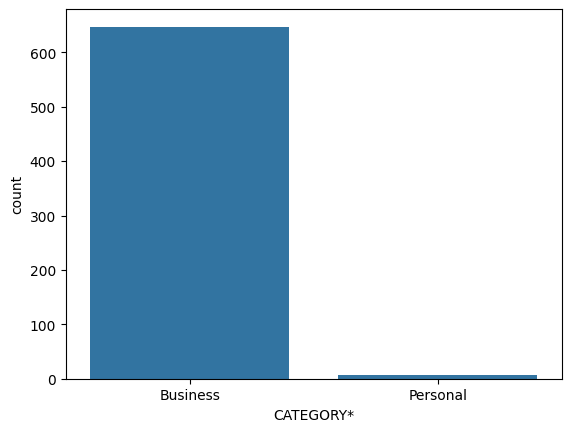

In [47]:
#sns.countplot(data["CATEGORY*"])
sns.countplot(x = "CATEGORY*", data = data)

# Check how long do people travel with Uber?

In [26]:
data['MILES*']

0        5.1
2        4.8
3        4.7
4       63.7
5        4.3
        ... 
1150     0.7
1151     3.9
1152    16.2
1153     6.4
1154    48.2
Name: MILES*, Length: 653, dtype: float64

<Axes: ylabel='Frequency'>

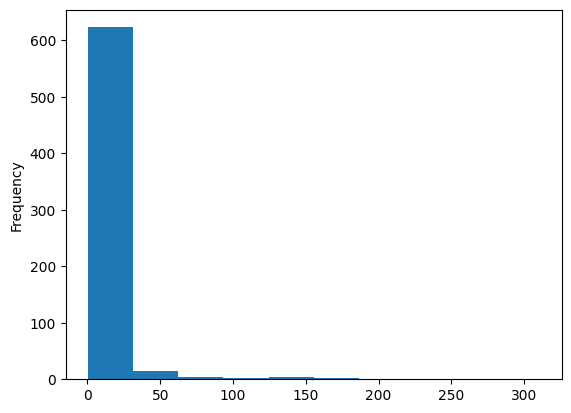

In [27]:
data['MILES*'].plot.hist()

Conc1: Mostly people travel in a short mile with uber

# What Hour do most people take uber to their destination

In [28]:
hours = data["START_DATE*"].dt.hour.value_counts()
hours

START_DATE*
13    55
14    52
17    51
18    51
15    51
20    45
16    45
12    43
11    39
19    35
21    34
10    33
9     26
22    21
23    21
8     17
0     13
7      8
1      4
5      3
3      3
6      2
2      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Trips per Hour')

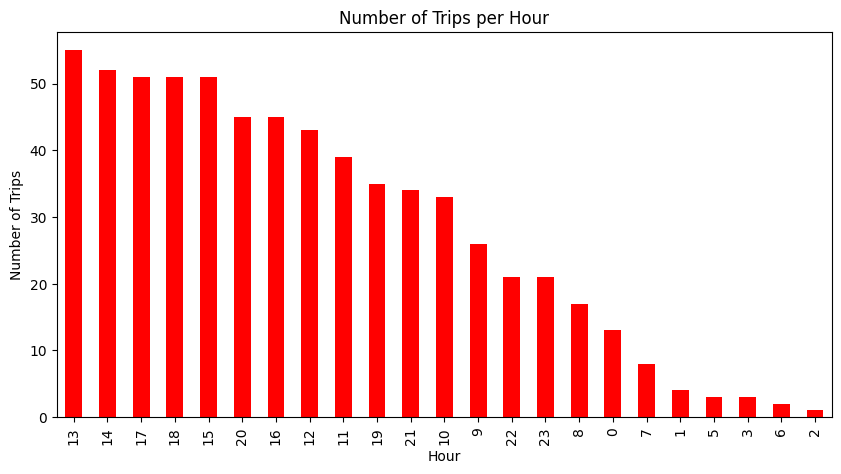

In [29]:
hours.plot(kind = "bar", color = "red", figsize = (10,5))
plt.xlabel("Hour")
plt.ylabel("Number of Trips")
plt.title("Number of Trips per Hour")


We can see that, at 13hrs(1:00 PM) 14, 17,15 AND 18 HRS are booked most number of uber rides and least at 1AM, 3AM, 5AM,6AM and 2AM